In [439]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [440]:
# Importing the dataset
train = pd.read_csv('train_original.csv')
test = pd.read_csv('test_original.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [441]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [442]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Exploratory Data Analysis
##### Summary:
- **Missing values:** Age (177), Cabin (687), Embarked (2)
- No strong correlation between the numerical variables (Age, SibSp, Parch, Fare)
- Consider normalizing SibSp, Parch, Fare
- The people who Survived have a higher mean Fare value. *Possibility: richer people were given priority for being saved.*
- There were:
    - More passengers in 3rd class;
    - More male passengers aboard;
    - More passengers who embarked in 'S'.
- The Ticket and Cabin columns have too much information to plot correctly. Maybe some feature engineering is required.
- The number of passengers in 3rd class who died outnumbers the sum of dead passengers from 1st and 2nd classes combined - note that this class also had a higher number of passengers overall.
- Of all passengers who died, most were male (almost 6x more men died than women).
- Most passengers who died had embarked in 'S'. This may be due to the higher number of passengers who embarked in this place.

<AxesSubplot:>

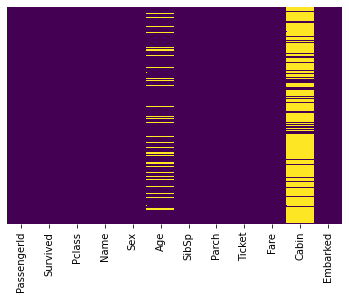

In [443]:
sns.heatmap(train.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [444]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

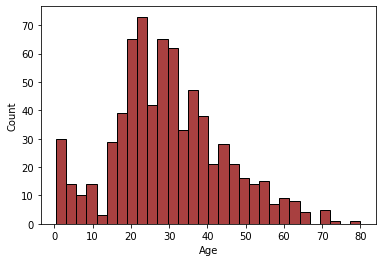

In [445]:
sns.histplot(train['Age'], bins=30, color='darkred')

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

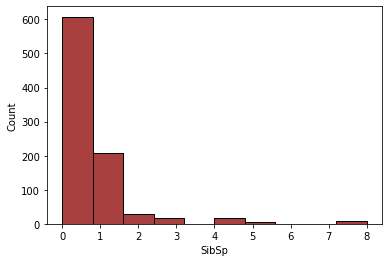

In [446]:
sns.histplot(train['SibSp'], bins=10, color='darkred')

<AxesSubplot:xlabel='Parch', ylabel='Count'>

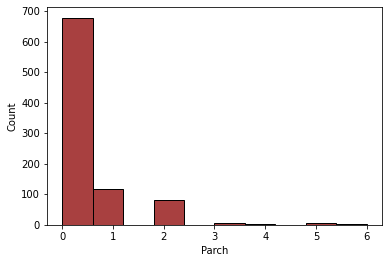

In [447]:
sns.histplot(train['Parch'], bins=10, color='darkred')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

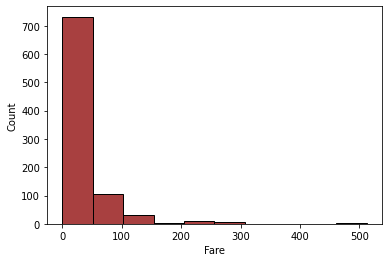

In [448]:
sns.histplot(train['Fare'], bins=10, color='darkred')

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

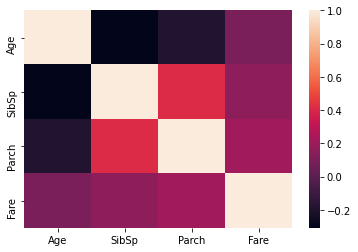

In [449]:
print(train[['Age','SibSp','Parch','Fare']].corr())

sns.heatmap(train[['Age','SibSp','Parch','Fare']].corr())

In [450]:
pd.pivot_table(train, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


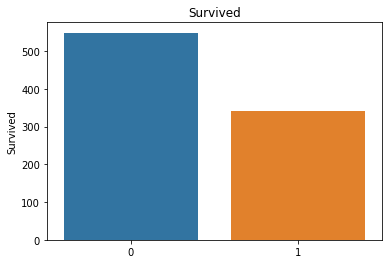

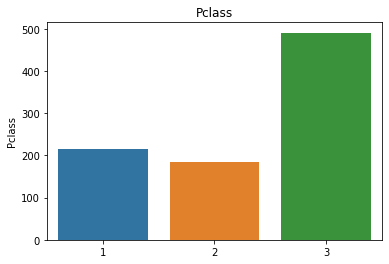

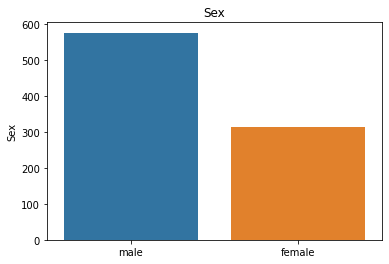

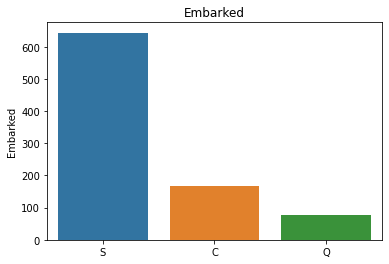

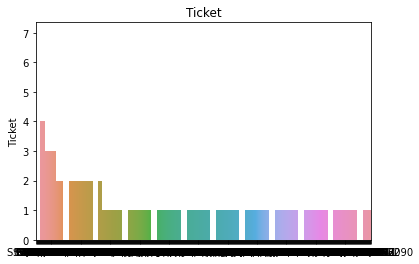

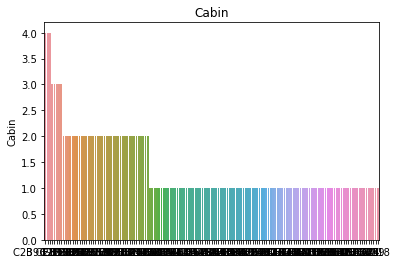

In [451]:
for i in ['Survived','Pclass','Sex','Embarked','Ticket','Cabin']:
    sns.barplot(x = train[i].value_counts().index,
                y = train[i].value_counts()
               ).set_title(i)
    plt.show()

In [452]:
for i in ['Pclass','Sex','Embarked']:
    print(pd.pivot_table(train, index='Survived', columns=i, values='Ticket', aggfunc='count'))
    print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



### Data Preprocessing
##### Summary:
- The train and test data are joined in a single dataframe to perform the following steps:
    1. Drop the rows which have null values for the Embarked columns (2 in train, 0 in test).
    2. Drop non-relevant columns: PassengerId, Cabin (there are too many missing values), Ticket (the ticket numbers don't seem to have some coherence or provide relevant information), Name (I tried some feature engineering to extract the title of each passenger and check if it had any relation to the survival rate - it didn't).
    3. Impute missing data for 'Fare' and 'Age'. The 'Fare' data is highly skewed, so I decided to use the median for missing values. The 'Age' could be imputed with mean or median, since it doesn't have a very high skew. I chose the median for simplicity.
    4. Applying a normalization to the Fare column (Age, SibSp and Parch don't benefit from this, i.e., the data doesn't get more symmetrical).
    5. Encoding categorical data (Pclass, Sex and Embarked). Note that, even though Pclass is a numerical variable, its essence is mostly categorical, so it will be enconded.
    6. Splitting the entire dataset into train and test sets.
    7. Feature scaling numerical variables (Age, SibSp, Parch, Fare_norm). This is performed after splitting the data so that there is no data leakage

In [453]:
# Joining the train and test sets. The auxiliary variables will help split the data afterwards
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train, test])

In [454]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
train_test       0
Survived       418
dtype: int64

In [455]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

In [456]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

In [457]:
# Task 1: drop NaN from 'Embarked'
all_data.dropna(subset=['Embarked'], inplace=True)

In [458]:
# Task 2: drop non-relevant columns
all_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

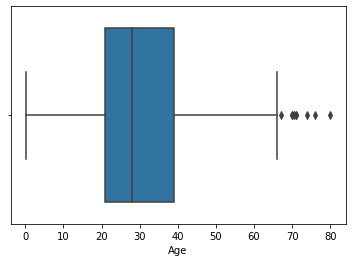

<AxesSubplot:xlabel='Fare'>

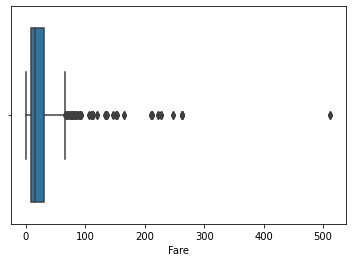

In [459]:
# Task 3: impute missing values for 'Age' and 'Fare'
from sklearn.impute import SimpleImputer

sns.boxplot(x='Age', data=all_data)
plt.show()
sns.boxplot(x='Fare', data=all_data)

In [460]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
all_data['Age'] = imp.fit_transform(all_data['Age'].values.reshape(-1,1))[:,0]
all_data['Fare'] = imp.fit_transform(all_data['Fare'].values.reshape(-1,1))[:,0]

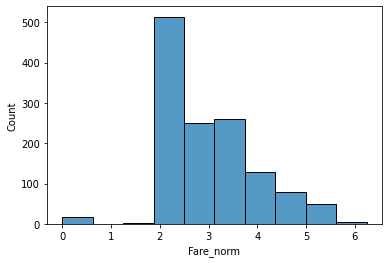

In [461]:
# Task 4: applying a normalization to the Fare column
all_data['Fare_norm'] = np.log(all_data['Fare']+1)
sns.histplot(all_data['Fare_norm'], bins=10)
all_data.drop('Fare', axis=1, inplace=True)

In [462]:
# Task 5: encoding categorical variables (Pclass, Sex, Embarked)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_vars = ['Pclass','Sex','Embarked']
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), cat_vars)], remainder='passthrough')

In [463]:
aux_data = ct.fit_transform(all_data)
cols = ct.get_feature_names()
print(cols)

['encoder__x0_1', 'encoder__x0_2', 'encoder__x0_3', 'encoder__x1_female', 'encoder__x1_male', 'encoder__x2_C', 'encoder__x2_Q', 'encoder__x2_S', 'Survived', 'Age', 'SibSp', 'Parch', 'train_test', 'Fare_norm']


In [464]:
aux_data = pd.DataFrame(aux_data, columns=cols)
for val in cols:
    if 'encoder' in val:
        aux_data[val] = aux_data[val].astype(int)

aux_data.head()

,encoder__x0_1,encoder__x0_2,encoder__x0_3,encoder__x1_female,encoder__x1_male,encoder__x2_C,encoder__x2_Q,encoder__x2_S,Survived,Age,SibSp,Parch,train_test,Fare_norm
0,0,0,1,0,1,0,0,1,0.0,22.0,1.0,0.0,1.0,2.110213
1,1,0,0,1,0,1,0,0,1.0,38.0,1.0,0.0,1.0,4.280593
2,0,0,1,1,0,0,0,1,1.0,26.0,0.0,0.0,1.0,2.188856
3,1,0,0,1,0,0,0,1,1.0,35.0,1.0,0.0,1.0,3.990834
4,0,0,1,0,1,0,0,1,0.0,35.0,0.0,0.0,1.0,2.202765


In [465]:
for idx, val in enumerate(cols):
    if 'encoder' in val:
        val_cat = int(val.split('x')[1].split('_')[0])
        val_class = val.split('x')[1].split('_')[1]
        cols[idx] = cat_vars[val_cat]+'_'+val_class

In [467]:
all_data = aux_data.set_axis(cols, axis=1)
all_data.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Age,SibSp,Parch,train_test,Fare_norm
0,0,0,1,0,1,0,0,1,0.0,22.0,1.0,0.0,1.0,2.110213
1,1,0,0,1,0,1,0,0,1.0,38.0,1.0,0.0,1.0,4.280593
2,0,0,1,1,0,0,0,1,1.0,26.0,0.0,0.0,1.0,2.188856
3,1,0,0,1,0,0,0,1,1.0,35.0,1.0,0.0,1.0,3.990834
4,0,0,1,0,1,0,0,1,0.0,35.0,0.0,0.0,1.0,2.202765


In [470]:
# Task 6: Splitting the entire dataframe once again into train and test datasets
X_train = all_data[all_data['train_test'] == 1].drop(['Survived','train_test'], axis=1)
X_test = all_data[all_data['train_test'] == 0].drop(['Survived','train_test'], axis=1)

y_train = all_data[all_data['train_test'] == 1]['Survived'].astype(int)

In [471]:
# Task 7: Feature scaling numerical variables (Age, SibSp, Parch, Fare_norm)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [472]:
X_train[['Age','SibSp','Parch','Fare_norm']] = sc.fit_transform(X_train[['Age','SibSp','Parch','Fare_norm']])
X_test[['Age','SibSp','Parch','Fare_norm']] = sc.fit_transform(X_test[['Age','SibSp','Parch','Fare_norm']])

### Exporting the new datasets for model building

In [474]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)